In [27]:
#降维Tsne探索实验
import spacy

# 加载英语模型
nlp = spacy.load("en_core_web_md")

# 读取poem1.txt文件内容
with open('poem1.txt', 'r') as file:
    text = file.read()

# 处理文本
doc = nlp(text)

# 提取名词、动词、形容词和副词
poetic_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
        poetic_words.append(token.text.lower())

# 创建词袋
word_bag = {}
for word in poetic_words:
    if word not in word_bag:
        word_bag[word] = 1
    else:
        word_bag[word] += 1

# 按词频降序排列词袋
sorted_word_bag = sorted(word_bag.items(), key=lambda x: x[1], reverse=True)

# 打印词袋
print("Poetic Word Bag:")
for word, freq in sorted_word_bag:
    print(f"{word}: {freq}")
    

Poetic Word Bag:
so: 20
street: 20
time: 14
old: 13
hair: 13
say: 11
here: 10
room: 10
have: 10
let: 10
then: 10
tea: 9
hands: 9
back: 9
all: 9
lamp: 9
man: 8
dry: 8
house: 8
window: 8
night: 8
evening: 8
hand: 8
white: 8
feet: 8
eyes: 8
said: 8
arms: 8
afternoon: 8
think: 7
now: 7
gives: 7
seen: 7
find: 7
much: 7
go: 7
known: 7
life: 7
see: 6
door: 6
has: 6
la: 6
end: 6
table: 6
-: 6
take: 6
know: 6
light: 6
smile: 6
friends: 6
smells: 6
too: 5
memory: 5
meet: 5
lost: 5
sea: 5
eye: 5
bed: 5
world: 5
air: 5
ends: 5
turn: 5
garden: 5
streets: 5
smoke: 5
days: 5
worth: 5
feel: 5
sleep: 4
head: 4
dark: 4
weave: 4
wind: 4
such: 4
many: 4
late: 4
only: 4
thought: 4
smell: 4
music: 4
left: 4
water: 4
knees: 4
smiles: 4
want: 4
talk: 4
never: 4
knew: 4
dead: 4
comes: 4
panes: 4
moon: 4
sit: 4
brown: 4
lady: 4
fall: 4
half: 4
question: 4
come: 4
yellow: 4
curled: 4
indeed: 4
dare: 4
morning: 4
fingers: 4
after: 4
at: 4
soul: 4
friend: 4
sure: 4
understand: 4
o'clock: 4
read: 3
gates: 3
bitten:

In [28]:
import spacy
from sklearn.decomposition import PCA
import numpy as np

# 加载英语模型
nlp = spacy.load("en_core_web_md")

# 读取poem1.txt文件内容
with open('poem1.txt', 'r') as file:
    text = file.read()

# 处理文本
doc = nlp(text)

# 提取名词、动词、形容词和副词
poetic_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
        poetic_words.append(token.text.lower())

# 去重
poetic_words = list(set(poetic_words))

# 获取词向量
word_vectors = []
for word in poetic_words:
    word_vectors.append(nlp(word).vector)

# 将词向量转换为NumPy数组
word_vectors = np.array(word_vectors)

# 使用PCA进行降维
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(word_vectors)

# 创建词袋并导出坐标
word_bag = {}
for i, word in enumerate(poetic_words):
    word_bag[word] = {
        'x': reduced_vectors[i][0],
        'y': reduced_vectors[i][1],
        'z': reduced_vectors[i][2]
    }

# 打印词袋和坐标
print("Poetic Word Bag with Coordinates:")
for word, coords in word_bag.items():
    print(f"{word}: x={coords['x']:.4f}, y={coords['y']:.4f}, z={coords['z']:.4f}")

Poetic Word Bag with Coordinates:
rooms: x=-0.7850, y=16.4926, z=6.3124
penitence: x=12.1298, y=-7.7578, z=-0.1258
reverse: x=10.5790, y=2.7651, z=-3.7107
nocturne: x=3.4490, y=-2.5156, z=12.3020
page: x=3.6972, y=5.9592, z=2.5189
fera: x=-3.5819, y=-2.3850, z=12.2671
sprawling: x=3.7626, y=7.5824, z=2.7936
opens: x=-0.4911, y=-3.0410, z=6.4807
season: x=6.3251, y=5.6432, z=12.7062
sneezes: x=-4.0731, y=-2.6808, z=-3.3608
steams: x=-2.8455, y=14.8858, z=4.9210
rusty: x=-15.4774, y=13.3780, z=-7.5450
collected: x=17.4552, y=0.5078, z=10.1601
departed: x=7.2773, y=-13.6432, z=15.4139
shirt: x=-20.5502, y=1.3238, z=3.9075
throwing: x=0.2634, y=1.7144, z=-2.6829
way-: x=-11.9435, y=-9.7313, z=4.8541
heavy: x=0.5205, y=13.8430, z=0.6866
below: x=2.3319, y=12.8837, z=4.0805
church: x=9.4170, y=-6.1188, z=9.4774
panes: x=0.1999, y=18.5788, z=5.5638
afternoon: x=-4.1870, y=-3.0251, z=6.2699
odds: x=-2.4204, y=-5.6902, z=-4.7964
dinner: x=-11.6390, y=-5.1539, z=0.6379
ribs: x=-18.2836, y=9.6810

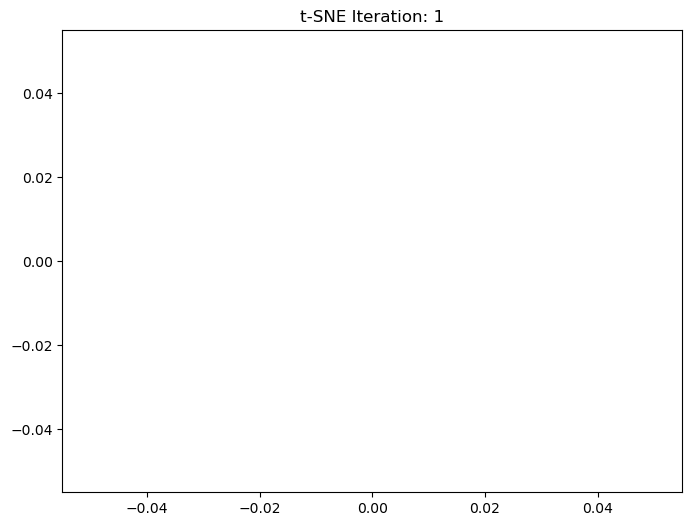

In [29]:
import spacy
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 加载英语模型
nlp = spacy.load("en_core_web_md")

# 读取poem1.txt文件内容
with open('poem1.txt', 'r') as file:
    text = file.read()

# 处理文本
doc = nlp(text)

# 提取名词、动词、形容词和副词
poetic_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
        poetic_words.append(token.text.lower())

# 去重
poetic_words = list(set(poetic_words))

# 获取词向量
word_vectors = []
for word in poetic_words:
    word_vectors.append(nlp(word).vector)

# 将词向量转换为NumPy数组
word_vectors = np.array(word_vectors)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=10)
reduced_vectors = tsne.fit_transform(word_vectors)

# 创建图形和散点图对象
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter([], [], alpha=0.8)

# 更新散点图的函数
def update(frame):
    scatter.set_offsets(tsne.embedding_[:(frame+1)*10])
    ax.set_title(f"t-SNE Iteration: {frame+1}")
    return scatter,

# 创建动画
ani = FuncAnimation(fig, update, frames=10, interval=1000, blit=True)

# 显示动画
plt.show()

In [30]:
import spacy
from sklearn.decomposition import PCA
import numpy as np
import json

# 加载英语模型
nlp = spacy.load("en_core_web_md")

# 读取poem1.txt文件内容
with open('poem1.txt', 'r') as file:
    text = file.read()

# 处理文本
doc = nlp(text)

# 提取名词、动词、形容词和副词
poetic_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
        poetic_words.append(token.text.lower())

# 去重
poetic_words = list(set(poetic_words))

# 获取词向量
word_vectors = []
for word in poetic_words:
    word_vectors.append(nlp(word).vector)

# 将词向量转换为NumPy数组
word_vectors = np.array(word_vectors)

# 使用PCA进行降维
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(word_vectors)

# 创建词袋并导出坐标
word_bag = {}
for i, word in enumerate(poetic_words):
    word_bag[word] = {
        'x': float(reduced_vectors[i][0]),
        'y': float(reduced_vectors[i][1]),
        'z': float(reduced_vectors[i][2])
    }

# 将词袋和坐标导出为JSON文件
with open('word_bag.json', 'w') as json_file:
    json.dump(word_bag, json_file, indent=4)

print("Word bag and coordinates exported to word_bag.json.")

Word bag and coordinates exported to word_bag.json.


In [31]:
import spacy
from sklearn.manifold import TSNE
import numpy as np
import json

# 加载英语模型
nlp = spacy.load("en_core_web_md")

# 读取poem1.txt文件内容
with open('poem1.txt', 'r') as file:
    text = file.read()

# 处理文本
doc = nlp(text)

# 提取名词、动词、形容词和副词
poetic_words = []
for token in doc:
    if token.pos_ in ['NOUN', 'VERB', 'ADJ', 'ADV']:
        poetic_words.append(token.text.lower())

# 去重
poetic_words = list(set(poetic_words))

# 获取词向量
word_vectors = []
for word in poetic_words:
    word_vectors.append(nlp(word).vector)

# 将词向量转换为NumPy数组
word_vectors = np.array(word_vectors)

# 使用t-SNE进行降维
tsne = TSNE(n_components=3, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)

# 创建词袋并导出坐标
word_bag = {}
for i, word in enumerate(poetic_words):
    word_bag[word] = {
        'x': float(reduced_vectors[i][0]),
        'y': float(reduced_vectors[i][1]),
        'z': float(reduced_vectors[i][2])
    }

# 将词袋和坐标导出为JSON文件
with open('word_bag_tsne.json', 'w') as json_file:
    json.dump(word_bag, json_file, indent=4)

print("Word bag and coordinates exported to word_bag_tsne.json.")

Word bag and coordinates exported to word_bag_tsne.json.


In [32]:
import json
import plotly.graph_objects as go

# 读取PCA结果
with open('word_bag.json', 'r') as f:
    pca_data = json.load(f)

# 读取t-SNE结果
with open('word_bag_tsne.json', 'r') as f:
    tsne_data = json.load(f)

# 提取PCA坐标和词汇
pca_x = [coord['x'] for coord in pca_data.values()]
pca_y = [coord['y'] for coord in pca_data.values()]
pca_z = [coord['z'] for coord in pca_data.values()]
pca_words = list(pca_data.keys())

# 提取t-SNE坐标和词汇
tsne_x = [coord['x'] for coord in tsne_data.values()]
tsne_y = [coord['y'] for coord in tsne_data.values()]
tsne_z = [coord['z'] for coord in tsne_data.values()]
tsne_words = list(tsne_data.keys())

# 创建PCA的3D散点图
pca_trace = go.Scatter3d(
    x=pca_x,
    y=pca_y,
    z=pca_z,
    mode='markers',
    marker=dict(
        size=1,
        color='blue',
        opacity=0.8
    ),
    text=pca_words,
    name='PCA'
)

# 创建t-SNE的3D散点图
tsne_trace = go.Scatter3d(
    x=tsne_x,
    y=tsne_y,
    z=tsne_z,
    mode='markers',
    marker=dict(
        size=1,
        color='red',
        opacity=0.8
    ),
    text=tsne_words,
    name='t-SNE'
)

# 创建布局
layout = go.Layout(
    title='PCA vs t-SNE: 3D Visualization',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# 创建图形对象
fig = go.Figure(data=[pca_trace, tsne_trace], layout=layout)

# 显示图形
fig.show()

In [33]:
import json
import plotly.graph_objects as go
from sklearn.neighbors import NearestNeighbors

# 读取PCA结果
with open('word_bag.json', 'r') as f:
    pca_data = json.load(f)

# 读取t-SNE结果
with open('word_bag_tsne.json', 'r') as f:
    tsne_data = json.load(f)

# 限制可视化的词汇数量
max_words = 100

# 提取PCA坐标和词汇
pca_coords = [[coord['x'], coord['y'], coord['z']] for coord in list(pca_data.values())[:max_words]]
pca_words = list(pca_data.keys())[:max_words]

# 提取t-SNE坐标和词汇
tsne_coords = [[coord['x'], coord['y'], coord['z']] for coord in list(tsne_data.values())[:max_words]]
tsne_words = list(tsne_data.keys())[:max_words]

# 计算PCA的邻居关系
pca_nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(pca_coords)
pca_distances, pca_indices = pca_nbrs.kneighbors(pca_coords)

# 计算t-SNE的邻居关系
tsne_nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(tsne_coords)
tsne_distances, tsne_indices = tsne_nbrs.kneighbors(tsne_coords)

# 创建PCA的3D散点图和邻居连线
pca_trace = go.Scatter3d(
    x=[coord[0] for coord in pca_coords],
    y=[coord[1] for coord in pca_coords],
    z=[coord[2] for coord in pca_coords],
    mode='markers+text',
    marker=dict(size=5, color='blue', opacity=0.8),
    text=pca_words,
    name='PCA'
)

pca_edges = []
for i in range(len(pca_coords)):
    for j in pca_indices[i][1:]:
        pca_edges.append(go.Scatter3d(
            x=[pca_coords[i][0], pca_coords[j][0]],
            y=[pca_coords[i][1], pca_coords[j][1]],
            z=[pca_coords[i][2], pca_coords[j][2]],
            mode='lines',
            line=dict(color='lightblue', width=1),
            showlegend=False
        ))

# 创建t-SNE的3D散点图和邻居连线
tsne_trace = go.Scatter3d(
    x=[coord[0] for coord in tsne_coords],
    y=[coord[1] for coord in tsne_coords],
    z=[coord[2] for coord in tsne_coords],
    mode='markers+text',
    marker=dict(size=5, color='red', opacity=0.8),
    text=tsne_words,
    name='t-SNE'
)

tsne_edges = []
for i in range(len(tsne_coords)):
    for j in tsne_indices[i][1:]:
        tsne_edges.append(go.Scatter3d(
            x=[tsne_coords[i][0], tsne_coords[j][0]],
            y=[tsne_coords[i][1], tsne_coords[j][1]],
            z=[tsne_coords[i][2], tsne_coords[j][2]],
            mode='lines',
            line=dict(color='pink', width=1),
            showlegend=False
        ))

# 创建布局
layout = go.Layout(
    title=f'PCA vs t-SNE: 3D Visualization with Neighbors (Top {max_words} Words)',
    scene=dict(
        xaxis=dict(title='X'),
        yaxis=dict(title='Y'),
        zaxis=dict(title='Z')
    )
)

# 创建图形对象
fig = go.Figure(data=[pca_trace, *pca_edges, tsne_trace, *tsne_edges], layout=layout)

# 显示图形
fig.show()

       Combination  Frequency
0        near_come          9
1    leave_flutter          6
2         have_day          5
3       old_priest          4
4       wild_water          4
5      human_child          4
6       white_foot          4
7      ancient_way          4
8     know_phoenix          4
9           so_let          4
10      away_drive          3
11      white_bird          3
12       young_man          3
13     name_friend          3
14      legged_fly          3
15      white_star          3
16   strange_thing          3
17  little_childer          3
18         away_go          3
19    common_thing          3


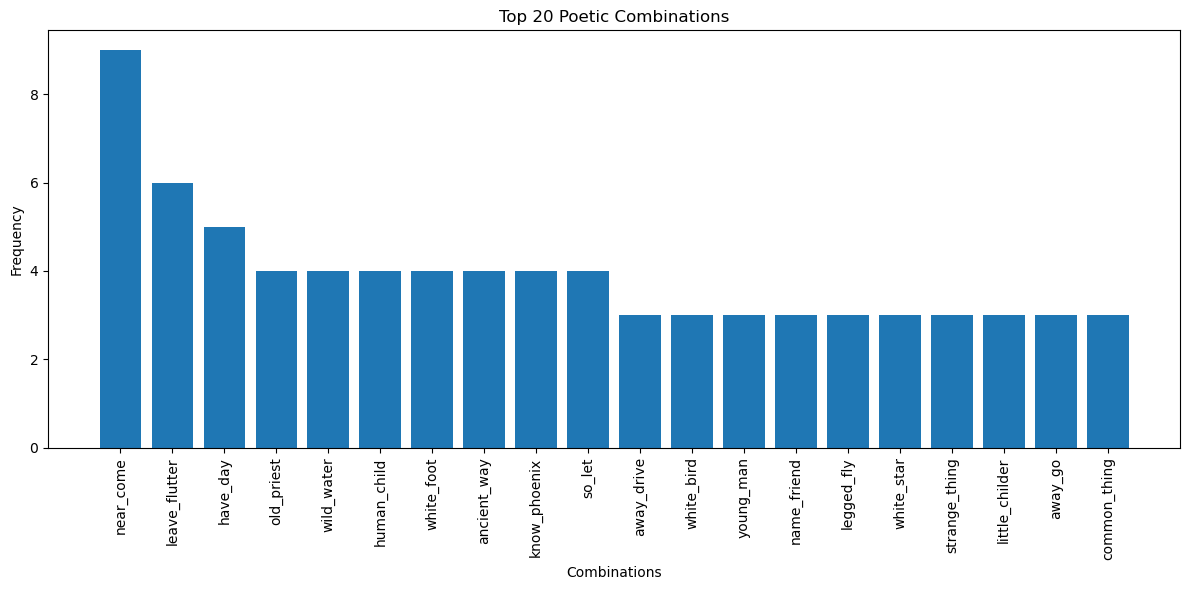

Results saved to poetic_combinations.csv


In [2]:
import json
import csv
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Load the English language model
nlp = spacy.load("en_core_web_md")

def extract_poetic_combinations(doc):
    combinations = []
    for token in doc:
        if token.pos_ in ["VERB", "NOUN", "ADJ", "ADV"]:
            # Verb + Noun
            if token.pos_ == "VERB":
                for child in token.children:
                    if child.dep_ == "dobj" and child.pos_ == "NOUN":
                        combinations.append(f"{token.lemma_}_{child.lemma_}")
            
            # Adjective + Noun
            if token.pos_ == "ADJ":
                if token.head.pos_ == "NOUN":
                    combinations.append(f"{token.lemma_}_{token.head.lemma_}")
            
            # Adverb + Verb
            if token.pos_ == "ADV":
                if token.head.pos_ == "VERB":
                    combinations.append(f"{token.lemma_}_{token.head.lemma_}")
    
    return combinations

def process_poems(json_data):
    all_combinations = []
    
    for poem in json_data['poems']:
        doc = nlp(poem['content'])
        combinations = extract_poetic_combinations(doc)
        all_combinations.extend(combinations)
    
    return Counter(all_combinations)

# Load JSON data
with open("yeats-poems-dancerealted.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

# Process poems
combination_counter = process_poems(data)

# Convert to DataFrame
df = pd.DataFrame(combination_counter.items(), columns=['Combination', 'Frequency'])
df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Display top 20 combinations
print(df.head(20))

# Plot top 20 combinations
plt.figure(figsize=(12, 6))
plt.bar(df['Combination'][:20], df['Frequency'][:20])
plt.xticks(rotation=90)
plt.title("Top 20 Poetic Combinations")
plt.xlabel("Combinations")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Export to CSV
df.to_csv("poetic_combinations.csv", index=False)
print("Results saved to poetic_combinations.csv")

           Phrase  Frequency
0    ancient ways          4
1        of years          4
2      white feet          4
3     human child          4
4   to the waters          4
5    with a faery          4
6         in hand          4
7          so let          4
8      of weeping          4
9         of love          4
10     old priest          4
11    white birds          3
12     in silence          3
13    white stars          3
14        at play          3
15     of the sea          3
16     in all men          3
17       of stars          3
18     legged fly          3
19       of heart          3


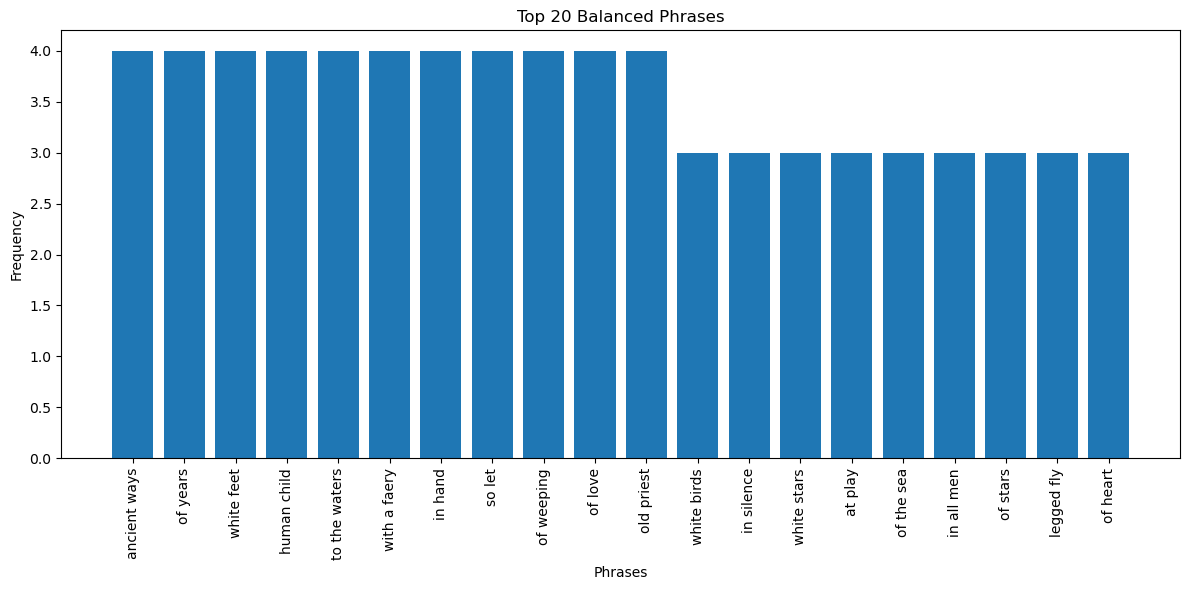

Results saved to balanced_poetic_phrases.csv


In [4]:
import json
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from spacy.matcher import Matcher

# Load the English language model
nlp = spacy.load("en_core_web_md")

def extract_balanced_phrases(doc):
    matcher = Matcher(nlp.vocab)
    
    # Pattern for Adjective + Noun
    matcher.add("ADJ_NOUN", [[{"POS": "ADJ"}, {"POS": "NOUN"}]])
    
    # Pattern for Verb + (Adjective) + Noun
    matcher.add("VERB_OBJ", [[{"POS": "VERB"}, {"POS": "ADJ", "OP": "?"}, {"POS": "NOUN"}]])
    
    # Pattern for Adverb + Verb
    matcher.add("ADV_VERB", [[{"POS": "ADV"}, {"POS": "VERB"}]])
    
    # Pattern for Preposition + Noun
    matcher.add("PREP_NOUN", [[{"POS": "ADP"}, {"POS": "DET", "OP": "?"}, {"POS": "ADJ", "OP": "?"}, {"POS": "NOUN"}]])

    matches = matcher(doc)
    
    phrases = []
    for match_id, start, end in matches:
        span = doc[start:end]
        if 2 <= len(span.text.split()) <= 4:  # Ensure phrase length is between 2 and 4 words
            phrases.append(span.text.lower())
    
    return phrases

def process_poems(json_data):
    all_phrases = []
    
    for poem in json_data['poems']:
        doc = nlp(poem['content'])
        phrases = extract_balanced_phrases(doc)
        all_phrases.extend(phrases)
    
    return Counter(all_phrases)

# Load JSON data
with open("yeats-poems-dancerealted.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

# Process poems
phrase_counter = process_poems(data)

# Convert to DataFrame
df = pd.DataFrame(phrase_counter.items(), columns=['Phrase', 'Frequency'])
df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Display top 20 phrases
print(df.head(20))

# Plot top 20 phrases
plt.figure(figsize=(12, 6))
plt.bar(df['Phrase'][:20], df['Frequency'][:20])
plt.xticks(rotation=90)
plt.title("Top 20 Balanced Phrases")
plt.xlabel("Phrases")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Export to CSV
df.to_csv("balanced_poetic_phrases.csv", index=False)
print("Results saved to balanced_poetic_phrases.csv")

Extracted dance terms: ['run', 'heavy', 'turn', 'finger', 'move', 'bee', 'man', 'faerie', 'think', 'toss', 'hurry', 'more', 'swan', 'creel', 'chase', 'tune', 'movement', 'stand', 'footstep', 'cannon', 'truth', 'dreary', 'undo', 'see', 'whirl', 'purr', 'unloved', 'leap', 'hope', 'hand', 'glow', 'fitful', 'wildere', 'outdance', 'fire', 'life', 'instep', 'music', 'melody', 'wary', 'seem', 'gather', 'beat', 'dart', 'tread', 'turning', 'return', 'golden', 'step', 'band', 'head', 'toil', 'slide', 'dance', 'one', 'chinese', 'sway', 'go', 'glide', 'tongue', 'daughter', 'wizard', 'wandering', 'grasshopper', 'shake', 'mind', 'loud', 'full', 'rage', 'image', 'spinning', 'turnin', 'silver', 'crown', 'dancer', 'song', 'peahen', 'shy', 'mirthful', 'slow', 'sing', 'pulse', 'sweet', 'priest', 'shade', 'year', 'high', 'thing', 'dream', 'brood', 'land', 'cracked', 'eyeball', 'die', 'hear', 'druid', 'parrot', 'dancing', 'fix', 'round', 'mortal', 'olden', 'whirling', 'leafy', 'right', 'hold']
            

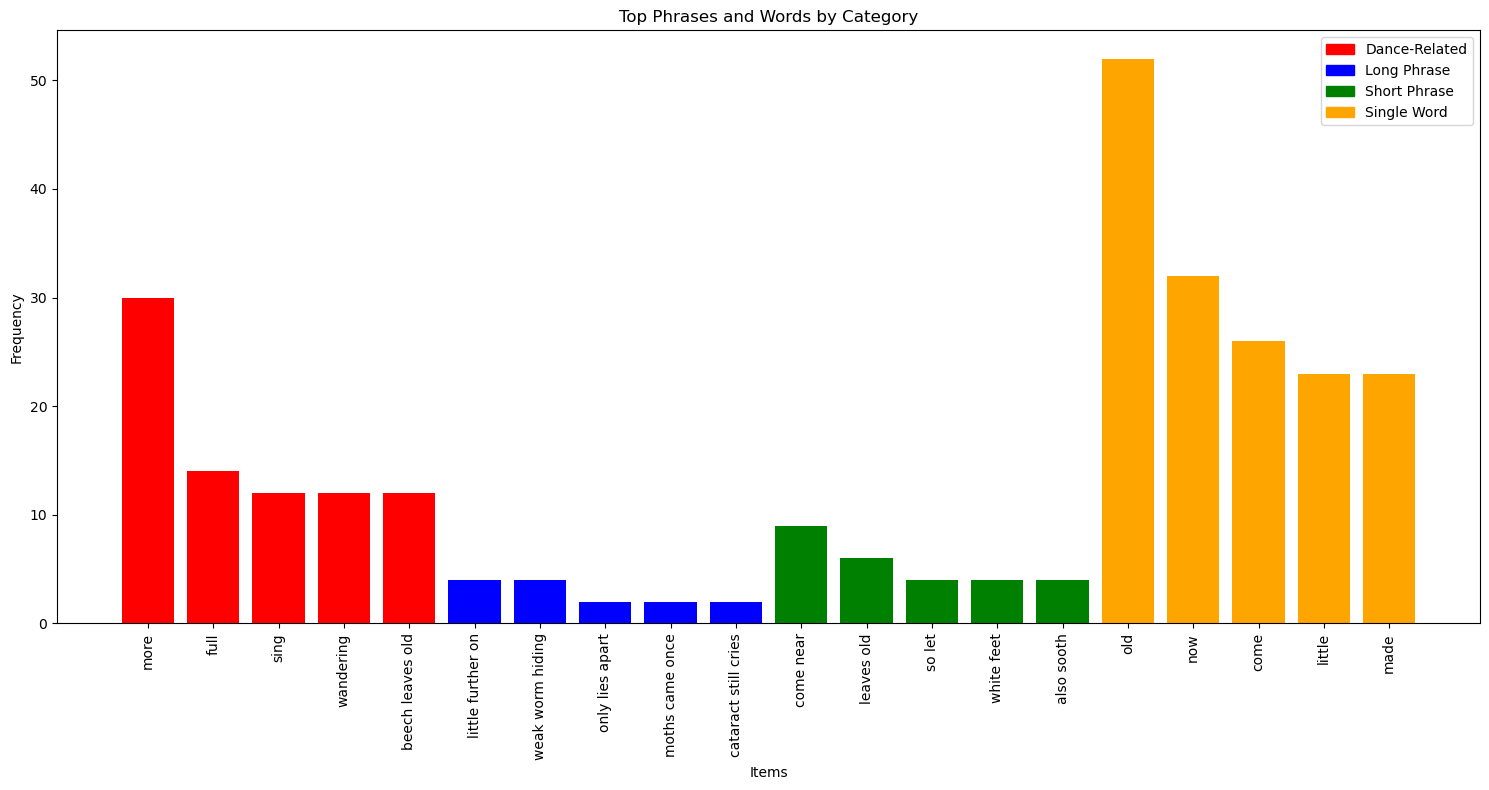

Results saved to comprehensive_poetic_analysis.csv


In [6]:
import json
import spacy
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from spacy.matcher import Matcher, PhraseMatcher

# Load the English language model
nlp = spacy.load("en_core_web_md")

# Define a broader list of dance-related roots and terms
dance_roots = ['danc', 'choreograph', 'ballet', 'waltz', 'tango', 'jig', 'reel', 'twirl', 'spin', 'leap', 'pirouette', 'sway', 'rhythm']
movement_terms = ['move', 'step', 'turn', 'glide', 'slide', 'jump', 'hop', 'skip', 'whirl']
music_terms = ['music', 'song', 'melody', 'tune', 'rhythm', 'beat', 'tempo']

def extract_dance_terms(json_data):
    dance_terms = set()
    phrase_matcher = PhraseMatcher(nlp.vocab)
    
    # Add patterns for multi-word terms
    patterns = [nlp(term) for term in ['dance floor', 'dance hall', 'dance music', 'dance performance']]
    phrase_matcher.add("DANCE_PHRASES", patterns)
    
    for poem in json_data['poems']:
        doc = nlp(poem['content'].lower())
        
        # Check for dance roots and related terms
        for token in doc:
            if any(root in token.lemma_ for root in dance_roots) or \
               any(term in token.lemma_ for term in movement_terms + music_terms):
                dance_terms.add(token.lemma_)
                # Add surrounding words to capture related terms
                for child in token.children:
                    if child.pos_ in ["ADJ", "NOUN", "VERB"]:
                        dance_terms.add(child.lemma_)
        
        # Check for multi-word dance terms
        matches = phrase_matcher(doc)
        for match_id, start, end in matches:
            span = doc[start:end]
            dance_terms.add(span.text)
    
    return list(dance_terms)

def extract_phrases_and_words(doc, dance_terms):
    matcher = Matcher(nlp.vocab)
    
    # Pattern for longer phrases (3-6 words)
    matcher.add("LONG_PHRASE", [[{"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}}, 
                                 {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}}, 
                                 {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}},
                                 {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}, "OP": "?"},
                                 {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}, "OP": "?"},
                                 {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}, "OP": "?"}]])
    
    # Pattern for shorter phrases (2-3 words)
    matcher.add("SHORT_PHRASE", [[{"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}}, 
                                  {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}},
                                  {"POS": {"IN": ["ADJ", "NOUN", "VERB", "ADV"]}, "OP": "?"}]])

    matches = matcher(doc)
    
    phrases_and_words = []
    for match_id, start, end in matches:
        span = doc[start:end]
        phrases_and_words.append(span.text.lower())
    
    # Add individual emotional words (verbs, adjectives, adverbs)
    for token in doc:
        if token.pos_ in ["VERB", "ADJ", "ADV"] and token.is_alpha and len(token.text) > 2:
            phrases_and_words.append(token.text.lower())
    
    return phrases_and_words

def process_poems(json_data, dance_terms):
    all_items = []
    
    for poem in json_data['poems']:
        doc = nlp(poem['content'])
        items = extract_phrases_and_words(doc, dance_terms)
        all_items.extend(items)
    
    return Counter(all_items)

# Load JSON data
with open("yeats-poems-dancerealted.json", 'r', encoding='utf-8') as f:
    data = json.load(f)

# Extract dance terms from the data
dance_terms = extract_dance_terms(data)
print("Extracted dance terms:", dance_terms)

# Process poems
item_counter = process_poems(data, dance_terms)

# Convert to DataFrame
df = pd.DataFrame(item_counter.items(), columns=['Item', 'Frequency'])
df = df.sort_values('Frequency', ascending=False).reset_index(drop=True)

# Categorize items
def categorize_item(item, dance_terms):
    if any(term in item for term in dance_terms):
        return 'Dance-Related'
    elif len(item.split()) > 2:
        return 'Long Phrase'
    elif len(item.split()) == 2:
        return 'Short Phrase'
    else:
        return 'Single Word'

df['Category'] = df['Item'].apply(lambda x: categorize_item(x, dance_terms))

# Display top items from each category
categories = ['Dance-Related', 'Long Phrase', 'Short Phrase', 'Single Word']
top_items = pd.concat([df[df['Category'] == cat].head(5) for cat in categories])
print(top_items)

# Plot top items
plt.figure(figsize=(15, 8))
colors = {'Dance-Related': 'red', 'Long Phrase': 'blue', 'Short Phrase': 'green', 'Single Word': 'orange'}
bars = plt.bar(top_items['Item'], top_items['Frequency'], color=top_items['Category'].map(colors))
plt.xticks(rotation=90)
plt.title("Top Phrases and Words by Category")
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=colors[cat]) for cat in categories], labels=categories)
plt.tight_layout()
plt.show()

# Export to CSV
df.to_csv("comprehensive_poetic_analysis.csv", index=False)
print("Results saved to comprehensive_poetic_analysis.csv")

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np

# Read CSV files
phrases_df = pd.read_csv('balanced_poetic_phrases.csv')
items_df = pd.read_csv('comprehensive_poetic_analysis.csv')

# Extract required columns
phrases = phrases_df['Phrase']
items = items_df['Item']

# Combine data
all_text = pd.concat([phrases, items])

# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

# Convert sparse matrix to dense
dense_matrix = tfidf_matrix.toarray()

# Apply t-SNE with random initialization
tsne = TSNE(n_components=3, random_state=42, init='random')
tsne_results = tsne.fit_transform(dense_matrix)

# Create result DataFrame
result_df = pd.DataFrame(data=tsne_results, columns=['x', 'y', 'z'])
result_df['text'] = all_text.values

# Save results to TSV file
result_df.to_csv('tsne_3d_results.tsv', sep='\t', index=False)

print("Processing complete. Results saved to tsne_3d_results.tsv")

Processing complete. Results saved to tsne_3d_results.tsv


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np

# 读取CSV文件
phrases_df = pd.read_csv('balanced_poetic_phrases.csv')
items_df = pd.read_csv('comprehensive_poetic_analysis.csv')

# 提取所需的列
phrases = phrases_df['Phrase']
items = items_df['Item']

# 合并数据
all_text = pd.concat([phrases, items])

# 创建TF-IDF向量
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

# 转换为密集矩阵
dense_matrix = tfidf_matrix.toarray()

# 应用t-SNE
tsne = TSNE(n_components=3, random_state=42, init='random')
tsne_results = tsne.fit_transform(dense_matrix)

# 创建向量数据的TSV文件
vector_df = pd.DataFrame(data=tsne_results, columns=['dim1', 'dim2', 'dim3'])
vector_df.to_csv('vectors.tsv', sep='\t', index=False, header=False)

# 创建元数据的TSV文件
metadata_df = pd.DataFrame({'text': all_text.values})
metadata_df.to_csv('metadata.tsv', sep='\t', index=False)

print("处理完成。")
print("向量数据已保存到 vectors.tsv")
print("元数据已保存到 metadata.tsv")

处理完成。
向量数据已保存到 vectors.tsv
元数据已保存到 metadata.tsv


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np

# 读取CSV文件
phrases_df = pd.read_csv('balanced_poetic_phrases.csv')
items_df = pd.read_csv('comprehensive_poetic_analysis.csv')

# 提取所需的列
phrases = phrases_df['Phrase']
items = items_df['Item']

# 合并数据
all_text = pd.concat([phrases, items])

# 创建TF-IDF向量
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

# 转换为密集矩阵
dense_matrix = tfidf_matrix.toarray()

# 应用t-SNE降至3维
tsne = TSNE(n_components=3, random_state=42, init='random')
tsne_results = tsne.fit_transform(dense_matrix)

# 创建向量数据的TSV文件
with open('vectors.tsv', 'w', encoding='utf-8') as f:
    for vector in tsne_results:
        f.write('\t'.join(map(str, vector)) + '\n')

# 创建元数据的TSV文件
with open('metadata.tsv', 'w', encoding='utf-8') as f:
    f.write('text\n')  # 写入列标题
    for text in all_text:
        f.write(text + '\n')

print("处理完成。")
print("向量数据已保存到 vectors.tsv")
print("元数据已保存到 metadata.tsv")

处理完成。
向量数据已保存到 vectors.tsv
元数据已保存到 metadata.tsv


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np

# 读取CSV文件
phrases_df = pd.read_csv('balanced_poetic_phrases.csv')
items_df = pd.read_csv('comprehensive_poetic_analysis.csv')

# 提取所需的列
phrases = phrases_df['Phrase']
items = items_df['Item']

# 合并数据
all_text = pd.concat([phrases, items])

# 创建TF-IDF向量
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(all_text)

# 转换为密集矩阵
dense_matrix = tfidf_matrix.toarray()

# 应用t-SNE降至3维
tsne = TSNE(n_components=3, random_state=42, init='random')
tsne_results = tsne.fit_transform(dense_matrix)

# 创建向量数据的TSV文件
with open('vectors.tsv', 'w', encoding='utf-8') as f:
    for vector in tsne_results:
        f.write('\t'.join(map(str, vector)) + '\n')

# 创建元数据的TSV文件（不包含标题行）
with open('metadata.tsv', 'w', encoding='utf-8') as f:
    for text in all_text:
        f.write(text + '\n')

print("处理完成。")
print("向量数据已保存到 vectors.tsv")
print("元数据已保存到 metadata.tsv")

处理完成。
向量数据已保存到 vectors.tsv
元数据已保存到 metadata.tsv


In [15]:
import json
import numpy as np
from scipy.spatial.distance import cdist

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

# 将 motion_vectors 转换为 NumPy 数组
motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

# 定义升维函数
def upsample_vector(vector, target_dim):
    original_dim = len(vector)
    # 重复原始向量
    repeated = np.tile(vector, target_dim // original_dim + 1)
    # 裁剪到目标维度
    upsampled = repeated[:target_dim]
    # 添加一些随机噪声以增加变化
    noise = np.random.randn(target_dim) * 0.01
    return upsampled + noise

# 对每个动作向量进行升维
motion_vectors_300d = np.array([upsample_vector(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

# 提取所有单词
all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 为每个单词创建一个随机300维向量（这里我们使用随机向量，实际应用中可能需要使用预训练的词向量）
word_vectors = np.random.randn(len(all_words), 300)

# 找到每个动作向量最近的单词
poem = []
for motion_vector in motion_vectors_300d:
    distances = cdist([motion_vector], word_vectors, metric='euclidean')[0]
    closest_word_index = np.argmin(distances)
    poem.append(all_words[closest_word_index])

# 简单的断句逻辑：每8个词一行
lines = [' '.join(poem[i:i+8]) for i in range(0, len(poem), 8)]
generated_poem = '\n'.join(lines)

print("生成的诗:")
print(generated_poem)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)
生成的诗:
Rose Rose Rose Rose Rose Rose Rose so
so have unknown, a a a a sudden
Tossing sudden true; have sudden sudden have sudden
sudden sudden have sudden sudden sudden sudden a
sudden sudden say? sudden sudden have unknown, unknown,
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudden sudden sudden sudden sudden sudden sudden
sudden sudd

In [16]:
import json
import numpy as np
from scipy.spatial.distance import cdist

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector(vector, target_dim):
    original_dim = len(vector)
    repeated = np.tile(vector, target_dim // original_dim + 1)
    upsampled = repeated[:target_dim]
    noise = np.random.randn(target_dim) * 0.01
    return upsampled + noise

motion_vectors_300d = np.array([upsample_vector(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

word_vectors = np.random.randn(len(all_words), 300)

def generate_poem_with_limited_repetition(motion_vectors, word_vectors, all_words, max_repetitions=3, window_size=10):
    poem = []
    word_count = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='euclidean')[0]
        sorted_indices = np.argsort(distances)
        
        for index in sorted_indices:
            word = all_words[index]
            recent_count = sum(1 for w in poem[-window_size:] if w == word)
            
            if word_count.get(word, 0) < max_repetitions or recent_count > 0:
                poem.append(word)
                word_count[word] = word_count.get(word, 0) + 1
                break
    
    return poem

poem = generate_poem_with_limited_repetition(motion_vectors_300d, word_vectors, all_words)

# 简单的断句逻辑：每8个词一行
lines = [' '.join(poem[i:i+8]) for i in range(0, len(poem), 8)]
generated_poem = '\n'.join(lines)

print("生成的诗:")
print(generated_poem)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)
生成的诗:
in in in Deserted Deserted Deserted Deserted to
The the the the the a a a
a a a he a a boy he
blinded long boy he blinded a a blinded
a a boy blinded a blinded blinded blinded
blinded blinded blinded a a a a a
a blinded blinded blinded a a a O
hair hair a a and and hair hair
a hair and a hair hair hair hair
hair hair hair hair hair hair hair hair
hair hair hair hair long long long long
long long long hair hair hair hair hair
hair hair hair long long long hair hair
hair hair long long long keenin' keenin' keenin'
O hair keenin' keenin' keenin' long long long
long long long long long long long long
long long long long long long long O
O O long long long long For long
waters waters waters waters waters waters waters waters
waters waters waters waters waters waters waters waters
waters waters waters waters waters waters waters waters
waters waters waters waters waters waters waters waters
waters water

In [17]:
import json
import numpy as np
from scipy.spatial.distance import cdist

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector(vector, target_dim):
    original_dim = len(vector)
    repeated = np.tile(vector, target_dim // original_dim + 1)
    upsampled = repeated[:target_dim]
    noise = np.random.randn(target_dim) * 0.01
    return upsampled + noise

motion_vectors_300d = np.array([upsample_vector(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 使用更复杂的词向量生成方法
word_vectors = np.random.randn(len(all_words), 300)
word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:, np.newaxis]

def generate_poem_with_diversity(motion_vectors, word_vectors, all_words, max_repetitions=2, cooldown=20, candidates=5):
    poem = []
    word_count = {}
    last_used = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='cosine')[0]
        sorted_indices = np.argsort(distances)
        
        for j in range(candidates):
            index = sorted_indices[j]
            word = all_words[index]
            
            if word_count.get(word, 0) < max_repetitions and (i - last_used.get(word, -cooldown)) > cooldown:
                poem.append(word)
                word_count[word] = word_count.get(word, 0) + 1
                last_used[word] = i
                break
        else:
            # 如果没有找到合适的词，使用一个随机词
            poem.append(np.random.choice(all_words))
    
    return poem

poem = generate_poem_with_diversity(motion_vectors_300d, word_vectors, all_words)

# 简单的断句逻辑：每8个词一行
lines = [' '.join(poem[i:i+8]) for i in range(0, len(poem), 8)]
generated_poem = '\n'.join(lines)

print("生成的诗:")
print(generated_poem)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)
生成的诗:
with down at are breast fear, the under
round before my there's from A thy the
flames gaze. sad alas! four, "Passion Or cataract
In the core. toiled read you before my
Or ancient there's thy fro. A all flames
the Cared gaze. sad all stretched though "Passion
the Of the white you child; there all
still bleed, is unwet; whispered "O, by ah!
make that the pride, O Among hurt of
Or on storm there lies world-troubling the men
And mavrone! man go thought. rain a longer
lips them path; dead, her did and since
live once purple shy while all the read
alas! the word a than western its yellow
at for mourn let dreams her of foot-fall.
solitudes perchance now the mar As time no
has the blow running waved his please from
And Along now, dead, the from things a
from moves may and tittle peep. hearts heart.
still of fro. Beauty world, ancient stars armchair
other's on lived, slowly sleep, in Glen-Car, I
things we'

In [19]:
import json
import numpy as np
from scipy.fft import fft, ifft
from scipy.spatial.distance import cdist

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector_fft(vector, target_dim):
    # 执行傅里叶变换
    fft_result = fft(vector)
    
    # 在频域中进行插值
    freq_resolution = len(fft_result) / target_dim
    upsampled_fft = np.zeros(target_dim, dtype=complex)
    
    for i in range(target_dim):
        src_index = int(i * freq_resolution)
        upsampled_fft[i] = fft_result[src_index]
    
    # 执行逆傅里叶变换
    upsampled = ifft(upsampled_fft).real
    
    # 添加少量噪声以增加变化
    noise = np.random.randn(target_dim) * 0.01 * np.std(upsampled)
    return upsampled + noise

motion_vectors_300d = np.array([upsample_vector_fft(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 使用更复杂的词向量生成方法
word_vectors = np.random.randn(len(all_words), 300)
word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:, np.newaxis]

def generate_poem_with_diversity(motion_vectors, word_vectors, all_words, max_repetitions=2, cooldown=20, candidates=5):
    poem = []
    word_count = {}
    last_used = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='cosine')[0]
        sorted_indices = np.argsort(distances)
        
        for j in range(candidates):
            index = sorted_indices[j]
            word = all_words[index]
            
            if word_count.get(word, 0) < max_repetitions and (i - last_used.get(word, -cooldown)) > cooldown:
                poem.append(word)
                word_count[word] = word_count.get(word, 0) + 1
                last_used[word] = i
                break
        else:
            # 如果没有找到合适的词，使用一个随机词
            poem.append(np.random.choice(all_words))
    
    return poem

poem = generate_poem_with_diversity(motion_vectors_300d, word_vectors, all_words)

# 简单的断句逻辑：每8个词一行
lines = [' '.join(poem[i:i+8]) for i in range(0, len(poem), 8)]
generated_poem = '\n'.join(lines)

print("生成的诗:")
print(generated_poem)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)
生成的诗:
old the The of less Those story, spinning-top.
with and to full stars their me; day,
Ollave human our labyrinth Down dress, may the
grassy has vows rain and a As and
full to stars their on story, Being pass;
brown you heart Knocknarea day, pale me; gather
The Down dress, drop human seen carry To
the handsome and The had on when there
grassy Driven A to And Where would had
fill! in Should sat nineteen moonlight, out heart:
hares the by, or seen Whether way They
may the a Father through, my In in;
shape ah, A has Who faeries, rooks, could
heart, out. eyelids to at proclaim between the
a through, moon, In of or hand, the
the you went thinks, to the saw no
their eternity; will a here up, was all
Beauty down, be huntsman, glance, pity As proclaim
with thy old, may wise; True praise, toys
falling men's light and player one proud the
every than friend us, the a he care
he sad; cries; farewell." ecstasy n

In [20]:
import json
import numpy as np
from scipy.fft import fft, ifft
from scipy.spatial.distance import cdist
import time

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector_fft(vector, target_dim):
    # 执行傅里叶变换
    fft_result = fft(vector)
    
    # 在频域中进行插值
    freq_resolution = len(fft_result) / target_dim
    upsampled_fft = np.zeros(target_dim, dtype=complex)
    
    for i in range(target_dim):
        src_index = int(i * freq_resolution)
        upsampled_fft[i] = fft_result[src_index]
    
    # 执行逆傅里叶变换
    upsampled = ifft(upsampled_fft).real
    
    # 注释掉噪声添加
    # noise = np.random.randn(target_dim) * 0.01 * np.std(upsampled)
    # return upsampled + noise
    return upsampled

motion_vectors_300d = np.array([upsample_vector_fft(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 使用更复杂的词向量生成方法
word_vectors = np.random.randn(len(all_words), 300)
word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:, np.newaxis]

def generate_poem_with_diversity(motion_vectors, word_vectors, all_words, max_repetitions=2, cooldown=20, candidates=5):
    poem = []
    word_count = {}
    last_used = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='cosine')[0]
        sorted_indices = np.argsort(distances)
        
        for j in range(candidates):
            index = sorted_indices[j]
            word = all_words[index]
            
            if word_count.get(word, 0) < max_repetitions and (i - last_used.get(word, -cooldown)) > cooldown:
                poem.append(word)
                word_count[word] = word_count.get(word, 0) + 1
                last_used[word] = i
                break
        else:
            # 如果没有找到合适的词，使用一个随机词
            poem.append(np.random.choice(all_words))
        
        # 每生成8个词，输出一行诗句
        if len(poem) % 8 == 0:
            print(' '.join(poem[-8:]))
            time.sleep(0.5)  # 暂停0.5秒，模拟实时效果
    
    return poem

print("生成的诗（实时输出）:")
poem = generate_poem_with_diversity(motion_vectors_300d, word_vectors, all_words)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)
生成的诗（实时输出）:
With Some keening; the come, sought man child's
solitudes were once lift Father they are pale,
I is "My that cave, them Peter in
glory he to feebly gently solitudes child's once
holes lift Father image pale, I gloom; "My
for they and you And with and sung
all bits anxious Thereon mused von could have
deer; fail And, But And place. unless of
he Were no Gathered you bind. In says
of man From Helpful bright the laughter my
falls sup; cloven with ground, And sweet holes
but in Both To the round; barbarous long-legged
when gaze John Caesar man's planets habits love,
the Adam Who Knowing Some still hath mused
that glory though trumpeting John To gloom; heart,
cracked Caesar when round a And heart's till
applaud their the The von leaves all long
my all Fuller's then know. fades won, That
the race; once bosom moorfowl, tooth. their being
is to things ivories you feet half hand
of some and lost And d

In [23]:
import json
import numpy as np
from scipy.fft import fft, ifft
from scipy.spatial.distance import cdist
import time

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)

print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector_fft(vector, target_dim):
    fft_result = fft(vector)
    freq_resolution = len(fft_result) / target_dim
    upsampled_fft = np.zeros(target_dim, dtype=complex)
    
    for i in range(target_dim):
        src_index = int(i * freq_resolution)
        upsampled_fft[i] = fft_result[src_index]
    
    upsampled = ifft(upsampled_fft).real
    return upsampled

motion_vectors_300d = np.array([upsample_vector_fft(v, 300) for v in motion_vectors])

print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 使用更复杂的词向量生成方法
word_vectors = np.random.randn(len(all_words), 300)
word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:, np.newaxis]

def generate_poem_with_timing_and_cooldown(motion_vectors, word_vectors, all_words, seconds_per_word=1, words_per_line=8, max_repetitions=2, cooldown=20, candidates=5):
    poem = []
    line = []
    word_count = {}
    last_used = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='cosine')[0]
        sorted_indices = np.argsort(distances)
        
        chosen_word = None
        for j in range(candidates):
            index = sorted_indices[j]
            word = all_words[index]
            
            if word_count.get(word, 0) < max_repetitions and (i - last_used.get(word, -cooldown)) > cooldown:
                chosen_word = word
                word_count[word] = word_count.get(word, 0) + 1
                last_used[word] = i
                break
        
        if chosen_word is None:
            chosen_word = np.random.choice(all_words)
        
        line.append(chosen_word)
        poem.append(chosen_word)
        
        print(chosen_word, end='', flush=True)
        time.sleep(seconds_per_word)
        
        if len(line) % words_per_line == 0:
            print()  # 换行
            print(' '.join(line))  # 打印完整的一行
            line = []  # 重置行
        else:
            print(" ", end='', flush=True)  # 在词之间添加空格
    
    # 打印最后一行（如果有的话）
    if line:
        print()
        print(' '.join(line))
    
    return poem

print("\n生成的诗（实时输出，每秒一个词）:")
poem = generate_poem_with_timing_and_cooldown(motion_vectors_300d, word_vectors, all_words)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)

生成的诗（实时输出，每秒一个词）:
And crawl for In and dancer.! That A
And crawl for In and dancer.! That A
yet centuries, nightmare are, of come fruit north
yet centuries, nightmare are, of come fruit north
childer; tears So the boy Is joy; for
childer; tears So the boy Is joy; for
ruined merry pavements In moth-hour silence

KeyboardInterrupt: 

In [24]:
import numpy as np
from scipy.fft import fft, ifft
from scipy.spatial.distance import cdist
import time

# 读取数据
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus_data = json.load(f)

# 提取动捕数据
motion_vectors = []
for frame in motion_data:
    vector = []
    for bone, coords in frame['bones'].items():
        vector.extend(coords)
    motion_vectors.append(vector)

motion_vectors = np.array(motion_vectors)
print("Original motion vectors shape:", motion_vectors.shape)

def upsample_vector_fft(vector, target_dim):
    fft_result = fft(vector)
    freq_resolution = len(fft_result) / target_dim
    upsampled_fft = np.zeros(target_dim, dtype=complex)
    
    for i in range(target_dim):
        src_index = int(i * freq_resolution)
        upsampled_fft[i] = fft_result[src_index]
    
    upsampled = ifft(upsampled_fft).real
    return upsampled

motion_vectors_300d = np.array([upsample_vector_fft(v, 300) for v in motion_vectors])
print("Upsampled motion vectors shape:", motion_vectors_300d.shape)

all_words = []
for poem in corpus_data['poems']:
    words = poem['content'].split()
    all_words.extend(words)

# 使用更复杂的词向量生成方法
word_vectors = np.random.randn(len(all_words), 300)
word_vectors = word_vectors / np.linalg.norm(word_vectors, axis=1)[:, np.newaxis]

def generate_poem_with_timing_and_cooldown(motion_vectors, word_vectors, all_words, seconds_per_word=1, words_per_line=8, max_repetitions=2, cooldown=20, candidates=5):
    poem = []
    line = []
    word_count = {}
    last_used = {}
    
    for i, motion_vector in enumerate(motion_vectors):
        distances = cdist([motion_vector], word_vectors, metric='cosine')[0]
        sorted_indices = np.argsort(distances)
        
        chosen_word = None
        for j in range(candidates):
            index = sorted_indices[j]
            word = all_words[index]
            
            if word_count.get(word, 0) < max_repetitions and (i - last_used.get(word, -cooldown)) > cooldown:
                chosen_word = word
                word_count[word] = word_count.get(word, 0) + 1
                last_used[word] = i
                break
        
        if chosen_word is None:
            chosen_word = np.random.choice(all_words)
        
        line.append(chosen_word)
        poem.append(chosen_word)
        
        print(chosen_word, end='', flush=True)
        time.sleep(seconds_per_word)
        
        if len(line) % words_per_line == 0:
            print()
            line = []
        else:
            print(" ", end='', flush=True)
    
    # 打印最后一行（如果有的话）
    if line:
        print()
    
    return poem

print("\n生成的诗（实时输出，每秒一个词）:")
poem = generate_poem_with_timing_and_cooldown(motion_vectors_300d, word_vectors, all_words)

# 导出升维后的数据为JSON
output_data = []
for i, vector in enumerate(motion_vectors_300d):
    output_data.append({
        "frame": motion_data[i]["frame"],
        "vector": vector.tolist()
    })

with open('motion_vectors_300d.json', 'w') as f:
    json.dump(output_data, f)

print("\n\n升维后的数据已保存到 motion_vectors_300d.json")

Original motion vectors shape: (333, 12)
Upsampled motion vectors shape: (333, 300)

生成的诗（实时输出，每秒一个词）:
The are as were and snow-white Because to
from tossing To eyeballs Although they sometimes now
Great fruit love wild the And in as
out they with were be Cried That To
tossing with eyeballs Although night they Know, no
love drunk softly horses; sometimes of Moll in
more had wary, grass Cried That still to
Still And tide; sighs; that The the sick
Hers says could There, long-legged of nor nigh
were mingling fall heart. And birds no Although
And men. your all meteors in she evening
is kiss burn Juliet more to our his
upon One in shell, they silver won at
And Know, help a fowl chaunt will dwelt
Arise off drunk with one, pass; and all
gentle "He There melody, build white with score
How That Michael, its a and the all
evening alone a Some betray; from domino, cloud.
my a-flutter with all cage the men under
bill flowers wild round; Rose The and I
to Powers one, she made works lion of
us to my

In [25]:
import json
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# 加载JSON语料库
with open('yeats-poems-dancerealted.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 提取诗歌内容构建文本列表
texts = [poem['content'] for poem in data['poems']]

# 对文本进行预处理,分词并转换为小写
processed_texts = [simple_preprocess(text, deacc=True, lowercase=True) for text in texts]

# 训练Word2Vec模型
model = Word2Vec(processed_texts, vector_size=100, window=5, min_count=1, workers=4)

# 保存训练好的模型
model.save("yeats_word2vec.model")

# 测试模型
print(model.wv.most_similar('dance', topn=5))
print(model.wv.similarity('rose', 'flower'))


TypeError: simple_preprocess() got an unexpected keyword argument 'lowercase'

In [38]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 加载动捕数据和语料库
with open('data_every_30_frames.json', 'r') as f:
    motion_data = json.load(f)

with open('yeats-poems-dancerealted.json', 'r') as f:
    corpus = json.load(f)

# 提取关键骨骼点坐标和诗歌内容
def extract_coordinates(frame):
    coordinates = []
    for bone in ['Skeleton_RToeEnd', 'Skeleton_LToeEnd', 'Skeleton_RIndex3End', 'Skeleton_LIndex3End']:
        coordinates.extend(frame['bones'][bone])
    return coordinates

motion_coordinates = np.array([extract_coordinates(frame) for frame in motion_data])
max_coords = np.max(motion_coordinates, axis=0)
min_coords = np.min(motion_coordinates, axis=0)
motion_coordinates = (motion_coordinates - min_coords) / (max_coords - min_coords)

poems = [poem['content'] for poem in corpus['poems']]
vocab = sorted(set(''.join(poems)))
char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = {idx: char for char, idx in char2idx.items()}
poem_sequences = [[char2idx[char] for char in poem] for poem in poems]
max_len = max(len(seq) for seq in poem_sequences)

# 定义数据生成器
def data_generator(motion_data, poem_sequences, batch_size):
    while True:
        motion_indices = np.random.choice(len(motion_data), size=batch_size)
        poem_indices = np.random.choice(len(poem_sequences), size=batch_size)
        
        batch_motion = np.array([motion_coordinates[i] for i in motion_indices])
        batch_motion = np.expand_dims(batch_motion, axis=1)  # 添加时间步维度
        
        batch_poems = [poem_sequences[i] for i in poem_indices]
        batch_poems_x = pad_sequences([seq[:-1] for seq in batch_poems], maxlen=max_len-1, padding='pre')
        batch_poems_y = pad_sequences([seq[1:] for seq in batch_poems], maxlen=max_len-1, padding='pre')
        
        yield ([batch_motion, batch_poems_x], batch_poems_y)

# 构建模型
encoder_inputs = Input(shape=(None, 12))
encoder_lstm = LSTM(256, return_state=True)
_, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(len(vocab), 256, mask_zero=True)
decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding(decoder_inputs), initial_state=encoder_states)
decoder_dense = Dense(len(vocab), activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 定义数据生成器的输出类型和形状
output_signature = (
    (tf.TensorSpec(shape=(None, 1, 12), dtype=tf.float32), tf.TensorSpec(shape=(None, max_len-1), dtype=tf.int32)),
    tf.TensorSpec(shape=(None, max_len-1), dtype=tf.int32)
)

# 训练模型
batch_size = 32
epochs = 100
steps_per_epoch = len(motion_data) // batch_size

model.fit(tf.data.Dataset.from_generator(lambda: data_generator(motion_coordinates, poem_sequences, batch_size),
                                         output_signature=output_signature),
          steps_per_epoch=steps_per_epoch,
          epochs=epochs)

# 提取编码器和解码器模型用于推理
encoder_model = Model(encoder_inputs, encoder_states)
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_inputs_embedded = decoder_embedding(decoder_inputs)
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs_embedded, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

# 使用模型生成诗歌
def generate_poem(motion_seq):
    states_value = encoder_model.predict(motion_seq)
    target_seq = np.zeros((1, 1, len(vocab)))
    target_seq[0, 0, char2idx['\n']] = 1.
    
    poem = ''
    while True:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2char[sampled_token_index]
        poem += sampled_char
        
        if sampled_char == '\n' or len(poem) > 500:
            break
            
        target_seq = np.zeros((1, 1, len(vocab)))
        target_seq[0, 0, sampled_token_index] = 1.
        states_value = [h, c]
        
    return poem

# 从测试动捕数据生成诗歌
test_motion_seq = motion_coordinates[-1].reshape(1, 1, 12)  # 修改这里，添加时间步维度
generated_poem = generate_poem(test_motion_seq)
print(generated_poem)


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ((tf.float32, tf.int32), tf.int32), but the yielded element was ([array([[[0.6476093 , 0.49652698, 0.32951618, 0.54453716, 0.47081333,
         0.21788744, 0.72399132, 0.63574938, 0.4896847 , 0.63322365,
         0.67181446, 0.75332129]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.57075494, 0.56006521, 0.47859974, 0.54184341, 0.58863163,
         0.33698856, 0.71137924, 0.65030884, 0.80389689, 0.67419756,
         0.67083538, 0.44044213]],

       [[0.64286486, 0.56743252, 0.73316868, 0.54985191, 0.37827786,
         0.48232705, 0.66354739, 0.65513947, 0.62247885, 0.51653111,
         0.64818503, 0.87253034]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.26589083, 0.26056798, 0.00470261, 0.15185135, 0.28407311,
         0.07782375, 0.42751606, 0.2119615 , 0.01986027, 0.18926211,
         0.29695765, 0.01341747]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.55290961, 0.50956005, 0.9270333 , 0.49543701, 0.51379793,
         0.58512579, 0.78080552, 0.62436376, 0.98804307, 0.63046996,
         0.58169613, 0.98745823]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.49828385, 0.52297502, 0.13874199, 0.35417567, 0.48074025,
         0.04988712, 0.77958759, 0.6833948 , 0.3073834 , 0.2844733 ,
         0.72069937, 0.07432324]],

       [[0.66552002, 0.6143436 , 0.10569544, 0.66446382, 0.37703701,
         0.06248381, 0.71019382, 0.67195167, 0.43858817, 0.78333076,
         0.49659213, 0.36590842]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.62084999, 0.55403223, 0.69760617, 0.57984751, 0.35433849,
         0.71395711, 0.72378664, 0.50019391, 0.41149779, 0.14011647,
         0.34033361, 0.74912114]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.59181522, 0.60296537, 0.67711293, 0.56563293, 0.56951236,
         0.41958043, 0.7054622 , 0.65730093, 0.80602558, 0.60846335,
         0.53094722, 0.990421  ]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[1.        , 0.64150675, 0.27573636, 0.89360804, 0.79728052,
         0.19241863, 0.76393778, 0.6987586 , 0.59246707, 0.61927495,
         0.5800823 , 0.53415776]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61609252, 0.3532997 , 0.10158186, 0.68788008, 0.3622804 ,
         0.06151663, 0.37419851, 0.63511348, 0.37876698, 0.99359475,
         0.3890021 , 0.39841864]],

       [[0.61988898, 0.53780973, 0.68980603, 0.45153978, 0.4201403 ,
         0.66979943, 0.73500405, 0.70093574, 0.85052849, 0.65345189,
         0.54877244, 0.72224935]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]]]), array([[ 0,  0,  0, ..., 35, 48, 38],
       [ 0,  0,  0, ..., 35, 60, 39],
       [ 0,  0,  0, ...,  1, 41, 49],
       ...,
       [19,  0, 23, ..., 37, 45, 53],
       [ 0,  0,  0, ..., 43, 52,  7],
       [ 0,  0,  0, ..., 49, 46, 38]])], array([[ 0,  0,  0, ..., 48, 38,  7],
       [ 0,  0,  0, ..., 60, 39,  7],
       [ 0,  0,  0, ..., 41, 49,  7],
       ...,
       [ 0, 23, 11, ..., 45, 53,  7],
       [ 0,  0,  0, ..., 52,  7,  3],
       [ 0,  0,  0, ..., 46, 38,  7]])).
Traceback (most recent call last):

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 204, in generator_py_func
    flattened_values = nest.flatten_up_to(output_types, values)
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\data\util\nest.py", line 237, in flatten_up_to
    return nest_util.flatten_up_to(
           ^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1541, in flatten_up_to
    return _tf_data_flatten_up_to(shallow_tree, input_tree)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1570, in _tf_data_flatten_up_to
    _tf_data_assert_shallow_structure(shallow_tree, input_tree)

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1444, in _tf_data_assert_shallow_structure
    _tf_data_assert_shallow_structure(

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\util\nest_util.py", line 1414, in _tf_data_assert_shallow_structure
    raise TypeError(

TypeError: If shallow structure is a sequence, input must also be a sequence. Input has type: 'list'.


The above exception was the direct cause of the following exception:


Traceback (most recent call last):

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "C:\ProgramData\anaconda3\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 206, in generator_py_func
    raise TypeError(

TypeError: `generator` yielded an element that did not match the expected structure. The expected structure was ((tf.float32, tf.int32), tf.int32), but the yielded element was ([array([[[0.6476093 , 0.49652698, 0.32951618, 0.54453716, 0.47081333,
         0.21788744, 0.72399132, 0.63574938, 0.4896847 , 0.63322365,
         0.67181446, 0.75332129]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.57075494, 0.56006521, 0.47859974, 0.54184341, 0.58863163,
         0.33698856, 0.71137924, 0.65030884, 0.80389689, 0.67419756,
         0.67083538, 0.44044213]],

       [[0.64286486, 0.56743252, 0.73316868, 0.54985191, 0.37827786,
         0.48232705, 0.66354739, 0.65513947, 0.62247885, 0.51653111,
         0.64818503, 0.87253034]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.26589083, 0.26056798, 0.00470261, 0.15185135, 0.28407311,
         0.07782375, 0.42751606, 0.2119615 , 0.01986027, 0.18926211,
         0.29695765, 0.01341747]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.55290961, 0.50956005, 0.9270333 , 0.49543701, 0.51379793,
         0.58512579, 0.78080552, 0.62436376, 0.98804307, 0.63046996,
         0.58169613, 0.98745823]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.49828385, 0.52297502, 0.13874199, 0.35417567, 0.48074025,
         0.04988712, 0.77958759, 0.6833948 , 0.3073834 , 0.2844733 ,
         0.72069937, 0.07432324]],

       [[0.66552002, 0.6143436 , 0.10569544, 0.66446382, 0.37703701,
         0.06248381, 0.71019382, 0.67195167, 0.43858817, 0.78333076,
         0.49659213, 0.36590842]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.62084999, 0.55403223, 0.69760617, 0.57984751, 0.35433849,
         0.71395711, 0.72378664, 0.50019391, 0.41149779, 0.14011647,
         0.34033361, 0.74912114]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.59181522, 0.60296537, 0.67711293, 0.56563293, 0.56951236,
         0.41958043, 0.7054622 , 0.65730093, 0.80602558, 0.60846335,
         0.53094722, 0.990421  ]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[1.        , 0.64150675, 0.27573636, 0.89360804, 0.79728052,
         0.19241863, 0.76393778, 0.6987586 , 0.59246707, 0.61927495,
         0.5800823 , 0.53415776]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]],

       [[0.61609252, 0.3532997 , 0.10158186, 0.68788008, 0.3622804 ,
         0.06151663, 0.37419851, 0.63511348, 0.37876698, 0.99359475,
         0.3890021 , 0.39841864]],

       [[0.61988898, 0.53780973, 0.68980603, 0.45153978, 0.4201403 ,
         0.66979943, 0.73500405, 0.70093574, 0.85052849, 0.65345189,
         0.54877244, 0.72224935]],

       [[0.61619212, 0.35322174, 0.1013901 , 0.68785336, 0.3621076 ,
         0.06135176, 0.37884467, 0.64902223, 0.36430171, 0.99522658,
         0.38327478, 0.40882214]]]), array([[ 0,  0,  0, ..., 35, 48, 38],
       [ 0,  0,  0, ..., 35, 60, 39],
       [ 0,  0,  0, ...,  1, 41, 49],
       ...,
       [19,  0, 23, ..., 37, 45, 53],
       [ 0,  0,  0, ..., 43, 52,  7],
       [ 0,  0,  0, ..., 49, 46, 38]])], array([[ 0,  0,  0, ..., 48, 38,  7],
       [ 0,  0,  0, ..., 60, 39,  7],
       [ 0,  0,  0, ..., 41, 49,  7],
       ...,
       [ 0, 23, 11, ..., 45, 53,  7],
       [ 0,  0,  0, ..., 52,  7,  3],
       [ 0,  0,  0, ..., 46, 38,  7]])).


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_13243]